<a href="https://colab.research.google.com/github/MelaOchoa/LosCapis/blob/CNN/ejercicio_2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Cargar datos
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Clases
nombres_clases = ['Avion', 'Automovil', 'Pajaro', 'Gato', 'Ciervo',
                  'Perro', 'Rana', 'Caballo', 'Barco', 'Camion']

print(f"Train: {x_train.shape}")
print(f"Test: {x_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train: (50000, 32, 32, 3)
Test: (10000, 32, 32, 3)


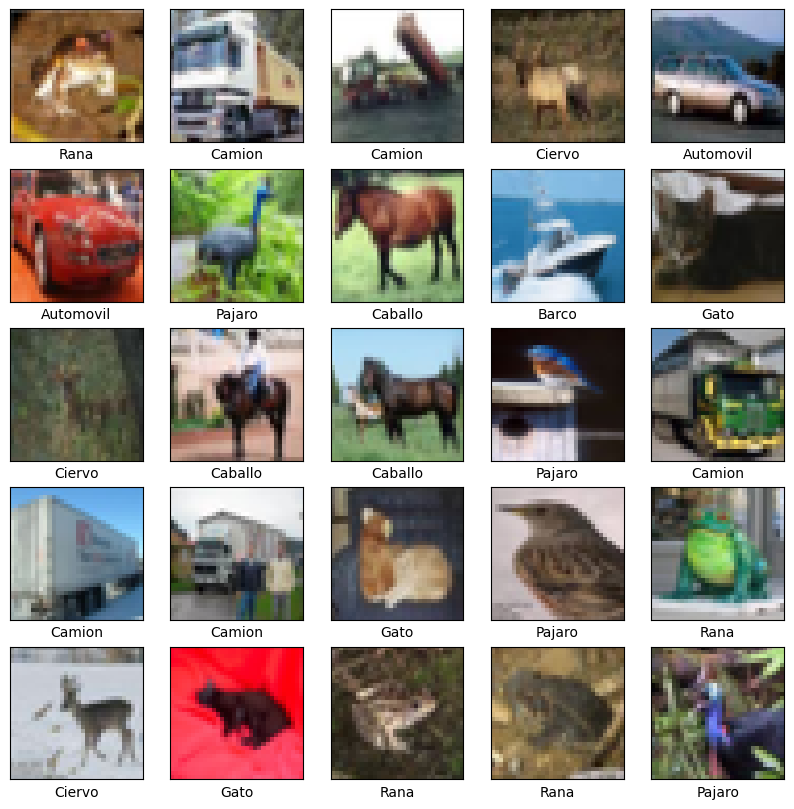

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(nombres_clases[y_train[i][0]])
plt.show()


In [ ]:
#normalizar imagenes
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [ ]:
#crear modelo CNN
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
modelo.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compilar y Entrenar el Modelo
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historial = modelo.fit(x_train, y_train, epochs=50,
                       validation_data=(x_test, y_test))


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 41ms/step - accuracy: 0.3330 - loss: 1.8186 - val_accuracy: 0.4811 - val_loss: 1.4408
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - accuracy: 0.5091 - loss: 1.3690 - val_accuracy: 0.5377 - val_loss: 1.3104
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.5686 - loss: 1.2096 - val_accuracy: 0.5776 - val_loss: 1.2062
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.6104 - loss: 1.1074 - val_accuracy: 0.5732 - val_loss: 1.2618
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.6417 - loss: 1.0174 - val_accuracy: 0.5531 - val_loss: 1.3452
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.6644 - loss: 0.9534 - val_accuracy: 0.6049 - val_loss: 1.1786
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 38ms/step - accuracy: 0.6762 - loss: 0.9173 - val_accuracy: 0.6233 - val_loss: 1.1408
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.6976 -

KeyboardInterrupt: 

In [ ]:
#EVALUAR EL MODELO
test_loss, test_acc = modelo.evaluate(x_test, y_test)
print("Precisión en test:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6332 - loss: 1.7777
Precisión en test: 0.6323999762535095


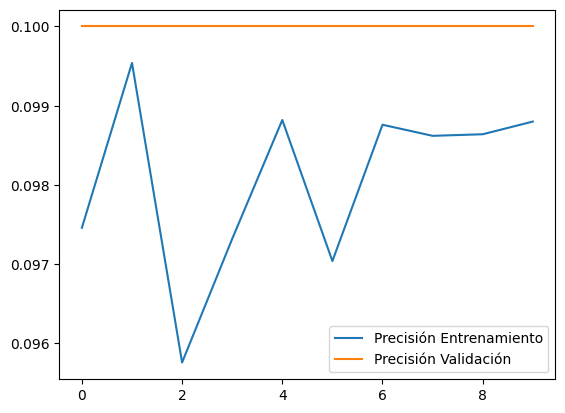

In [ ]:
#Graficar Resultados de Entrenamiento
plt.plot(historial.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión Validación')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


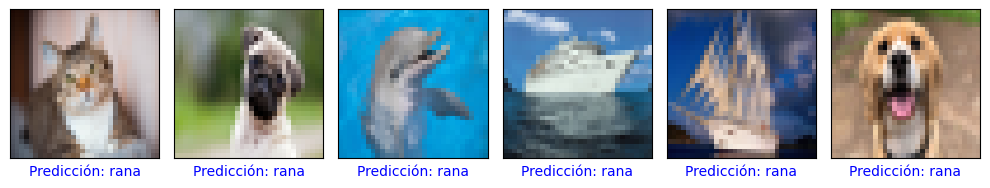

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import requests
from PIL import Image
from io import BytesIO

# Definir tamaño de imagen y clases CIFAR-10
TAMANO_IMG = 32
clases = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
          'perro', 'rana', 'caballo', 'barco', 'camión']

# Función para cargar imagen desde URL
def cargar_imagen(url):
    respuesta = requests.get(url)
    img = Image.open(BytesIO(respuesta.content)).convert('RGB')
    img = img.resize((TAMANO_IMG, TAMANO_IMG))
    img = np.array(img)
    img = img.astype(float) / 255
    return img

# URLs de imágenes externas
urls_imagenes = [
    "https://images.ctfassets.net/denf86kkcx7r/4IPlg4Qazd4sFRuCUHIJ1T/f6c71da7eec727babcd554d843a528b8/gatocomuneuropeo-97",
    "https://ichef.bbci.co.uk/ace/ws/640/cpsprodpb/15665/production/_107435678_perro1.jpg.webp",
    "https://images.dolphinaris.com/images/2015/03/5-curiosidades-sobre-los-delfines-Dolphinaris.jpg",
    "https://images.ecestaticos.com/HWTHnXnDxfVbIAzL6EuuyrZGJ3E=/0x0:693x450/1200x900/filters:fill(white):format(jpg)/f.elconfidencial.com%2Foriginal%2F419%2F0f5%2Fc96%2F4190f5c96bdd56e577b419bb1de6085c.jpg",
    "https://cdn.aarp.net/content/dam/aarp/travel/local-getaways/2018/03/1140-star-clipper-small-cruise-ships-esp.imgcache.rev.web.1000.575.jpg",
    "https://pampermut.com/blog/wp-content/uploads/2020/05/Como-es-el-caracter-de-tu-perro-segun-su-horoscopo-scaled.jpg",
]

# Cargar imágenes
imagenes_cargadas = [cargar_imagen(url) for url in urls_imagenes]
imagenes_cargadas = np.array(imagenes_cargadas)

# Predicción
predicciones = modelo.predict(imagenes_cargadas)

# Graficar resultados
plt.figure(figsize=(10, 5))
for i in range(len(imagenes_cargadas)):
    plt.subplot(1, len(imagenes_cargadas), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenes_cargadas[i])

    pred_clase = np.argmax(predicciones[i])
    nombre_clase = clases[pred_clase]

    color = 'blue'  # Por defecto
    plt.xlabel(f"Predicción: {nombre_clase}", color=color)

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


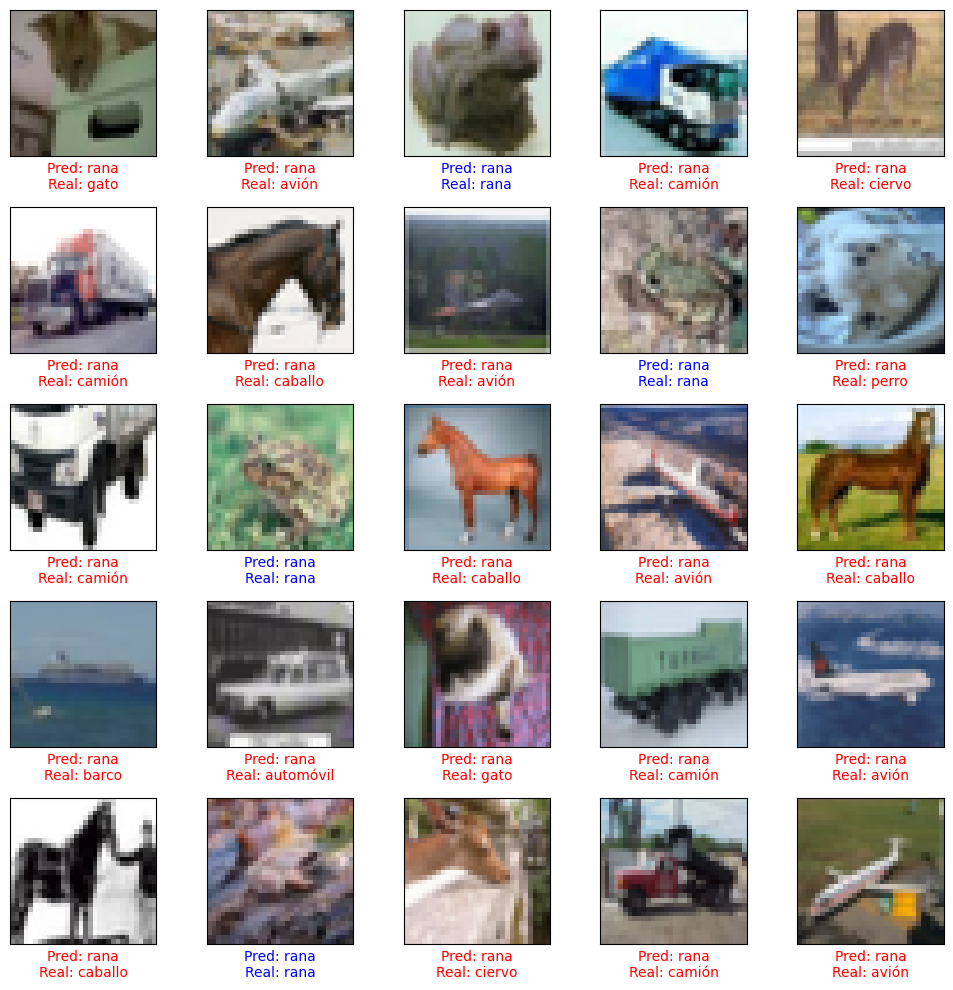

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Cargar dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Clases CIFAR-10
clases = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
          'perro', 'rana', 'caballo', 'barco', 'camión']

# Seleccionar 25 imágenes aleatorias del test
num_imagenes = 25
indices = np.random.choice(len(x_test), num_imagenes, replace=False)
imagenes = x_test[indices]
etiquetas_reales = y_test[indices]

# Normalizar las imágenes
imagenes = imagenes.astype(float) / 255.0

# Realizar predicciones
predicciones = modelo.predict(imagenes)
predicciones_clase = np.argmax(predicciones, axis=1)

# Graficar resultados
plt.figure(figsize=(10,10))
for i in range(num_imagenes):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenes[i])

    etiqueta_real = clases[etiquetas_reales[i][0]]
    etiqueta_predicha = clases[predicciones_clase[i]]

    color = 'blue' if etiqueta_real == etiqueta_predicha else 'red'

    plt.xlabel(f'Pred: {etiqueta_predicha}\nReal: {etiqueta_real}', color=color)
plt.tight_layout()
plt.show()
